In [1]:
import pandas as pd
import numpy as np
import torch
import os
import matplotlib.pyplot as plt


In [2]:
path1_cancer = '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/'
path1_non_cancer = '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Non_Cancer/'

In [23]:
p1=os.listdir(path1_cancer+'Training')
p2 = os.listdir(path1_non_cancer+'Training')
l1 = [path1_cancer+'Training/'+x for x in p1]
l2 = [path1_non_cancer+'Training/'+x for x in p2]
img_paths1_train = np.hstack([l1,l2])

p1=os.listdir(path1_cancer+'Testing')
p2 = os.listdir(path1_non_cancer+'Testing')
l1 = [path1_cancer+'Testing/'+x for x in p1]
l2 = [path1_non_cancer+'Testing/'+x for x in p2]
img_paths1_test = np.hstack([l1,l2])
len(img_paths1_train)

labels1_train=[]
for i in img_paths1_train:
    if 'Non_Cancer' in i:
        labels1_train.append(0)
    else:
        labels1_train.append(1)

labels1_test=[]
for i in img_paths1_test:
    if 'Non_Cancer' in i:
        labels1_test.append(0)
    else:
        labels1_test.append(1)
labels1_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [24]:
img_paths1_train

array(['../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1007-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1010-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1012-2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1031-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1051-3(94).jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1051-3(95).jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/113-1.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1157-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/120.2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1239-2.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Tr

In [25]:
path2_cancer_test = '../datasets/cancer/binary/binary-skin-cancer2/data/test/malignant/'
path2_non_cancer_test = '../datasets/cancer/binary/binary-skin-cancer2/data/test/benign/'

path2_cancer_train = '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\malignant/'
path2_non_cancer_train = '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/'

In [26]:
p1=os.listdir(path2_cancer_test)
p2 = os.listdir(path2_non_cancer_test)
l1 = [path2_cancer_test+x for x in p1]
l2 = [path2_non_cancer_test+x for x in p2]
img_paths2_test = np.hstack([l1,l2])

labels2_test=[]
for i in img_paths2_test:
    if 'benign' in i:
        labels2_test.append(0)
    else:
        labels2_test.append(1)


p1=os.listdir(path2_cancer_train)
p2 = os.listdir(path2_non_cancer_train)
l1 = [path2_cancer_train+x for x in p1]
l2 = [path2_non_cancer_train+x for x in p2]
img_paths2_train = np.hstack([l1,l2])

labels2_train=[]
for i in img_paths2_train:
    if 'benign' in i:
        labels2_train.append(0)
    else:
        labels2_train.append(1)
labels2_test


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [27]:
test_paths = np.hstack([img_paths1_test,img_paths2_test])
test_labels = np.hstack([labels1_test,labels2_test])

train_paths = np.hstack([img_paths1_train,img_paths2_train])
train_labels = np.hstack([labels1_train,labels2_train])
train_paths

array(['../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1007-1.jpg',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1010-01.JPG',
       '../datasets/cancer/binary/binary-skin-cancer/Skin_Data/Cancer/Training/1012-2.JPG',
       ...,
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/996.jpg',
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/997.jpg',
       '../datasets\\cancer\\binary\\binary-skin-cancer2\\data\\train\\benign/999.jpg'],
      dtype='<U88')

In [28]:
train_labels

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
train_labels.shape

(2877,)

In [30]:
train_paths.shape

(2877,)

In [39]:
test_paths.shape

(708,)

In [40]:
import cv2
count=0
test_images = np.zeros([len(test_paths),224,224,3])
for i in test_paths:
    im= cv2.resize(cv2.imread(i),[224,224])
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    test_images[count]=im
    count=count+1

In [38]:
import cv2
count=0
train_images = np.zeros([2877,224,224,3])
for i in train_paths:
    im= cv2.resize(cv2.imread(i),[224,224])
    im = (im-np.nanmin(im))/(np.nanmax(im)-np.nanmin(im))
    im = np.nan_to_num(im)
    train_images[count]=im
    count=count+1

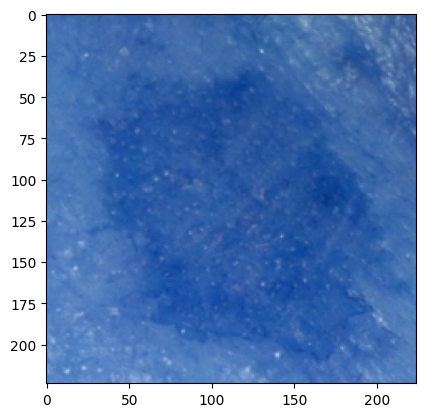

In [37]:
plt.imshow(train_images[2],cmap='jet')

In [61]:
import timm
import torch.nn as nn
model = nn.Sequential(timm.create_model('davit_tiny.msft_in1k', drop_path_rate=.2,num_classes=1,pretrained=True), nn.Sigmoid())
model

Sequential(
  (0): DaVit(
    (stem): Stem(
      (conv): Conv2d(3, 96, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm2d((96,), eps=1e-05, elementwise_affine=True)
    )
    (stages): Sequential(
      (0): DaVitStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): Sequential(
            (0): SpatialBlock(
              (cpe1): ConvPosEnc(
                (proj): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=96)
                (act): Identity()
              )
              (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=96, out_features=288, bias=True)
                (proj): Linear(in_features=96, out_features=96, bias=True)
                (softmax): Softmax(dim=-1)
              )
              (drop_path1): Identity()
              (cpe2): ConvPosEnc(
                (proj): Conv2d(96, 96, kernel_size

In [41]:
train_images = torch.tensor(train_images)
test_images = torch.tensor(test_images)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

In [56]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        images = self.images[index]
        labels = self.labels[index]
        return images.float(), labels.float()


In [70]:
from torch.optim.lr_scheduler import ExponentialLR
import torch.optim as optim

dataset = CustomDataset(train_images, train_labels)
# Create a dataloader
batch_size = 64

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = CustomDataset(test_images,test_labels)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 128
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(),lr=0.0001,weight_decay=.001)
gamma = .9994
scheduler = ExponentialLR(optimizer, gamma=gamma)

In [50]:
x,y = next(iter(dataloader))

tensor(0, dtype=torch.int32)

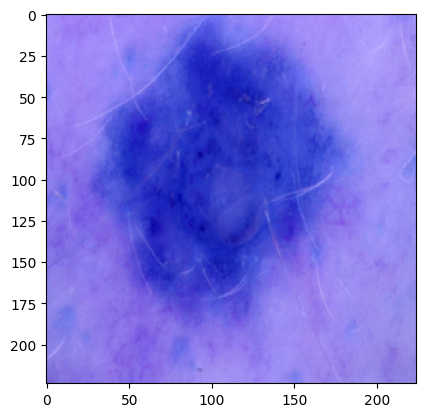

In [53]:
plt.imshow(x[0])
y[0]

In [71]:
import gc

optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=.0001)
gamma = .9994
scheduler = ExponentialLR(optimizer, gamma=gamma)
device='cuda'
model = nn.Sequential(timm.create_model('davit_tiny.msft_in1k', drop_path_rate=.2,num_classes=1,pretrained=True), nn.Sigmoid())
model.to(device)
num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for x,y in dataloader:
        x = x.permute(0,3,1,2)
        optimizer.zero_grad()
        outputs= model(x.to(device))
        loss = criterion(outputs.squeeze(1), y.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for x,y_tst in test_dataloader:
            x = x.permute(0,3,1,2)
            outputs_tst = model(x.to(device))
            loss2 = criterion(outputs_tst.squeeze(1), y_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

Epoch [1/400], Loss: 0.54191,  Test Loss: 0.49732, Learning Rate: 0.0009734
Epoch [2/400], Loss: 0.51769,  Test Loss: 0.48134, Learning Rate: 0.0009474
Epoch [3/400], Loss: 0.48687,  Test Loss: 0.49085, Learning Rate: 0.0009222
Epoch [4/400], Loss: 0.48107,  Test Loss: 0.46147, Learning Rate: 0.0008976
Epoch [5/400], Loss: 0.46998,  Test Loss: 0.46243, Learning Rate: 0.0008737
Epoch [6/400], Loss: 0.47920,  Test Loss: 0.48954, Learning Rate: 0.0008504
Epoch [7/400], Loss: 0.49758,  Test Loss: 0.48793, Learning Rate: 0.0008277
Epoch [8/400], Loss: 0.50396,  Test Loss: 0.46483, Learning Rate: 0.0008057
Epoch [9/400], Loss: 0.47365,  Test Loss: 0.47552, Learning Rate: 0.0007842
Epoch [10/400], Loss: 0.46376,  Test Loss: 0.46039, Learning Rate: 0.0007633
Epoch [11/400], Loss: 0.46545,  Test Loss: 0.46630, Learning Rate: 0.0007430
Epoch [12/400], Loss: 0.46632,  Test Loss: 0.45982, Learning Rate: 0.0007232
Epoch [13/400], Loss: 0.47300,  Test Loss: 0.47484, Learning Rate: 0.0007039
Epoch [1

KeyboardInterrupt: 

In [65]:
x.shape

torch.Size([32, 3, 224, 224])

In [66]:
y.shape

torch.Size([32])